In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
from statistics import mean

In [3]:
df = pd.read_csv("Traffic.csv")
df.columns =['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']
print(df)

             Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0     12:00:00 AM    10         Tuesday        31          0         4   
1     12:15:00 AM    10         Tuesday        49          0         3   
2     12:30:00 AM    10         Tuesday        46          0         3   
3     12:45:00 AM    10         Tuesday        51          0         2   
4      1:00:00 AM    10         Tuesday        57          6        15   
...           ...   ...             ...       ...        ...       ...   
2971  10:45:00 PM     9        Thursday        16          3         1   
2972  11:00:00 PM     9        Thursday        11          0         1   
2973  11:15:00 PM     9        Thursday        15          4         1   
2974  11:30:00 PM     9        Thursday        16          5         0   
2975  11:45:00 PM     9        Thursday        14          3         1   

      TruckCount  Total Traffic Situation  
0              4     39               low  
1              3     55

In [4]:
df.corr()

/var/folders/8_/9hdypyzx7137k_bnmnn4z11m0000gn/T/ipykernel_24834/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.013453,-0.005089,-0.015536,0.024734,-0.010679
CarCount,-0.013453,1.000000,0.722539,0.692994,-0.628157,0.970443
BikeCount,-0.005089,0.722539,1.000000,0.566364,-0.575399,0.797429
BusCount,-0.015536,0.692994,0.566364,1.000000,-0.546931,0.790705
TruckCount,0.024734,-0.628157,-0.575399,-0.546931,1.000000,-0.555471
Total,-0.010679,0.970443,0.797429,0.790705,-0.555471,1.000000


In [5]:
# create a list of our conditions
conditions = [
    (df['Traffic Situation'] == 'low'),
    (df['Traffic Situation'] == 'normal'),
    (df['Traffic Situation'] == 'heavy'),
    (df['Traffic Situation'] == 'high')
    ]

# create a list of the values we want to assign for each condition
values = [0,1,2,3]

# create a new column and use np.select to assign values to it using our lists as arguments
df['Traffic'] = np.select(conditions, values)
df[:5]

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Traffic
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,0
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,0
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,0
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,0
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,1


In [6]:
trainDF, testDF = train_test_split(df, test_size = 0.25, random_state = 0)
trainDF[:25]

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Traffic
330,10:30:00 AM,13,Friday,160,47,30,3,240,heavy,2
1009,12:15:00 PM,20,Friday,175,59,11,3,248,heavy,2
1888,4:00:00 PM,29,Sunday,120,14,25,8,167,normal,1
1078,5:30:00 AM,21,Sunday,51,7,4,5,67,low,0
2037,5:15:00 AM,31,Tuesday,110,18,10,11,149,normal,1
1700,5:00:00 PM,27,Friday,53,28,21,1,103,normal,1
2824,10:00:00 AM,8,Wednesday,42,25,37,12,116,high,3
836,5:00:00 PM,18,Wednesday,113,13,36,5,167,normal,1
1276,7:00:00 AM,23,Monday,105,35,24,2,166,normal,1
1017,2:15:00 PM,20,Friday,179,63,12,2,256,heavy,2


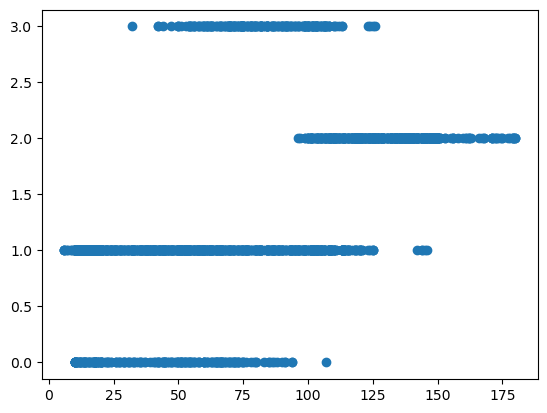

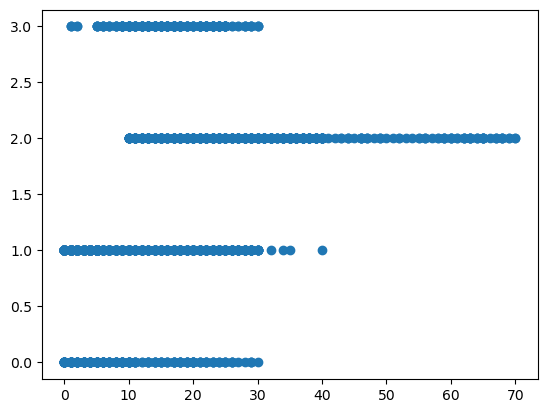

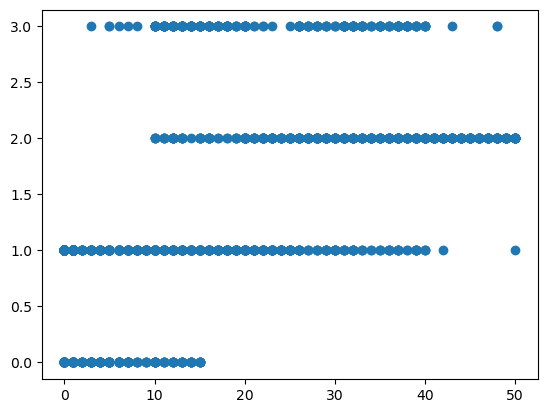

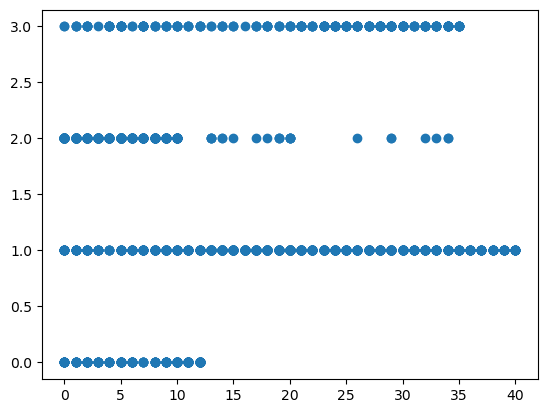

In [7]:
plt.scatter(trainDF['CarCount'],trainDF['Traffic'])
plt.show()
plt.scatter(trainDF['BikeCount'],trainDF['Traffic'])
plt.show()
plt.scatter(trainDF['BusCount'],trainDF['Traffic'])
plt.show()
plt.scatter(trainDF['TruckCount'],trainDF['Traffic'])
plt.show()

In [6]:
train_data_num = {"CarCount": trainDF["CarCount"],
           "BikeCount": trainDF["BikeCount"],
           "BusCount": trainDF["BusCount"],
           "TruckCount": trainDF["TruckCount"]}
trainDF_num = pd.DataFrame(train_data_num)

test_data_num = {"CarCount": testDF["CarCount"],
           "BikeCount": testDF["BikeCount"],
           "BusCount": testDF["BusCount"],
           "TruckCount": testDF["TruckCount"]}
testDF_num = pd.DataFrame(test_data_num)

y_train_data_num = {"Traffic": trainDF["Traffic"]}
y_trainDF_num = pd.DataFrame(y_train_data_num)
y_test_data_num = {"Traffic": testDF["Traffic"]}
y_testDF_num = pd.DataFrame(y_test_data_num)

In [7]:
reg = LinearRegression()
reg.fit(trainDF_num, trainDF["Traffic"])
y_train_pred = reg.predict(trainDF_num)
y_test_pred = reg.predict(testDF_num)

print("Linear Regression")
print(f"Coef = {reg.coef_}")
print(f"Intercept = {reg.intercept_}")
print(f"Training R^2 = {r2_score(trainDF['Traffic'], y_train_pred)}")
print(f"Testing R^2 = {r2_score(testDF['Traffic'], y_test_pred)}")

Linear Regression
Coef = [0.00817537 0.00794831 0.02938121 0.04661421]
Intercept = -0.5084693064704002
Training R^2 = 0.5871946462014692
Testing R^2 = 0.5666406064788108


In [8]:
poly2 = PolynomialFeatures(2, include_bias = False)
X2_train = poly2.fit_transform(trainDF_num)
X2_test = poly2.fit_transform(testDF_num)
y2_train = poly2.fit_transform(y_trainDF_num)
y2_test = poly2.fit_transform(y_testDF_num)

quad = LinearRegression()
quad.fit(X2_train, y2_train)
y2_train_pred = quad.predict(X2_train)
y2_test_pred = quad.predict(X2_test)

print("Quadratic Regression")
print(f"Training R^2 = {r2_score(y2_train, y2_train_pred)}")
print(f"Testing R^2  = {r2_score(y2_test, y2_test_pred)}")

Quadratic Regression
Training R^2 = 0.5629358150134136
Testing R^2  = 0.5511084542908786


In [9]:
poly3 = PolynomialFeatures(3, include_bias = False)
X3_train = poly3.fit_transform(trainDF_num)
X3_test = poly3.fit_transform(testDF_num)
y3_train = poly3.fit_transform(y_trainDF_num)
y3_test = poly3.fit_transform(y_testDF_num)

cube = LinearRegression()
cube.fit(X3_train, y3_train)
y3_train_pred = cube.predict(X3_train)
y3_test_pred = cube.predict(X3_test)

print("Cubic Regression")
print(f"Training R^2 = {r2_score(y3_train, y3_train_pred)}")
print(f"Testing R^2  = {r2_score(y3_test, y3_test_pred)}")

Cubic Regression
Training R^2 = 0.6671459670285883
Testing R^2  = 0.6637118406257296
